# Algoritmo backpropagation em Python

Implemente o algoritmo backpropagation em linguagem python e apresente um notebook correspondente com os comentários. Por fim, mostre o gráfico de erro em relação às épocas para o conjunto de dados:

**Entrada:**
<UL>
<LI>I1 = 0.05
<LI>I2 = 0.1
</UL> <br>

**Saída:**
<UL>
<LI>O1: 0.01
<LI>O2: 0.99
</UL>

## 1 - Pacotes ##

- [numpy](http://www.numpy.org)
- [matplotlib](http://matplotlib.org)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1) # configurar para ser os mesmos números aleatórios

## 2 - Dataset ##

Setar variáveis de entrada (X) e saída desejada (Y).

<table style="width:30%">
  <tr>
    <td>**entradas**</td>
    <td> x1 = 0,05 </td> 
    <td> x2 = 0,1 </td> 
  </tr>
  
    <tr>
    <td>**saida desejada**</td>
    <td> y1 = 0,01 </td> 
    <td> y2 = 0,99 </td> 
  </tr>
  
</table>

In [2]:
X = np.array([0.05, 0.1])
X

array([ 0.05,  0.1 ])

In [3]:
Y = np.array([0.01, 0.99])
Y

array([ 0.01,  0.99])

## 3 - Rede Neural 


##### Precisamos treinar a rede neural para fornecer as saidas desejadas

<table style="width:30%">
  <tr>
    <td>**entradas**</td>
    <td> x1 = 0,05 </td> 
    <td> x2 = 0,1 </td> 
  </tr>
  
    <tr>
    <td>**saida desejada**</td>
    <td> y1 = 0,01 </td> 
    <td> y2 = 0,99 </td> 
  </tr>
  
</table>

### Elementos desta rede:
<UL>
<LI>Entradas: x1; x2</LI>
<LI>Saidas: y1; y2</LI>
<LI>Pesos sinápticos: w1;w2; : : : ;w8 (Precisamos determinar por meio do treinamento)</LI>
<LI>Funções de ativações de cada neurônio (escolha experimental)</LI>
</UL>

### 3.1 - Configurar Pesos inicias ####

<img src="rede.png" style="width:600px;height:400px;">

<table align="left" style="width:60%">
  <tr>
    <th>**pesos**</th>
  </tr>
  <tr>
    <td> w1 = 0,15 </td>
  </tr>
  <tr>
    <td> w2 = 0,20 </td>
  </tr>
  <tr>
    <td> w3 = 0,25 </td>
  </tr>
  <tr>
    <td> w4 = 0,30 </td>
  </tr>
  <tr>
    <td> w5 = 0,40 </td>
  </tr>
  <tr>
    <td> w6 = 0,45 </td>
  </tr>
  <tr>
    <td> w7 = 0,50 </td>
  </tr>
  <tr>
    <td> w8 = 0,55 </td>
  </tr>
</table>


<table align="left" style="width:60%">
  <tr>
    <th>**bias**</th> 
  </tr>
  <tr>
    <td> b1h1 = 0,35 </td>
  </tr>
  <tr>
    <td> b1h2 = 0,35 </td>
  </tr>
  <tr>
    <td> b2o2 = 0,60 </td>
  </tr>
  <tr>
    <td> b2o2 = 0,60 </td>
  </tr>
</table>

In [4]:
# Pesos iniciais
w = np.array([0.15, #w1
              0.20, #w2
              0.25, #w3
              0.30, #w4
              0.40, #w5
              0.45, #w6
              0.50, #w7
              0.55  #w8
             ])
w

array([ 0.15,  0.2 ,  0.25,  0.3 ,  0.4 ,  0.45,  0.5 ,  0.55])

In [5]:
b = np.array([0.35, #b1h1
              0.35, #b1h2
              0.60, #b2o1
              0.60  #b2o2
             ])
b

array([ 0.35,  0.35,  0.6 ,  0.6 ])

### 3.2 - Propagação ####

Implementação  `propagacao()`.

In [6]:
def propagacao(X, w, b):
    """
    Parametros:
    X -- entrada de dados
    w -- pesos W
    b -- bias
    
    Retorna:
    gh1 -- função de ativação sigmoid de h1
    gh2 -- função de ativação sigmoid de h2
    go1 -- função de ativação sigmoid de o1
    go2 -- função de ativação sigmoid de o2
    """
    
    # Cálculo da primeira camada
    uh1 = X[0]*w[0] + X[1]*w[1] + b[0]*1.0  # uh1 = x1 * w1 + x2 * w2 + b1h1 * 1
    uh2 = X[0]*w[2] + X[1]*w[3] + b[1]*1.0  # uh2 = x1 * w3 + x2 * w4 + b1h2 * 1
    gh1 = 1.0 / (1.0 + np.exp(-uh1))        # gh1 = sigmoid de uh1
    gh2 = 1.0 / (1.0 + np.exp(-uh2))        # gh2 = sigmoid de uh2
    
    # Cálculo da segunda camada
    uo1 = gh1*w[4] + gh2*w[5] + b[2]*1.0    # uo1 = gh1 * w5 + gh2 * w6 + b2o1 * 1
    uo2 = gh1*w[6] + gh2*w[7] + b[3]*1.0    # uo2 = gh1 * w7 + gh2 * w8 + b2o2 * 1
    go1 = 1.0 / (1.0 + np.exp(-uo1))        # go1 = sigmoid de uo1
    go2 = 1.0 / (1.0 + np.exp(-uo2))        # go2 = sigmoid de uo2
    
    return gh1, gh2, go1, go2

In [7]:
#Verificar:
gh1, gh2, go1, go2 = propagacao(X, w, b)
print ('gh1 = ', gh1)
print ('gh2 = ', gh2)
print ('go1 = ', go1)
print ('go2 = ', go2)

gh1 =  0.593269992107
gh2 =  0.59688437826
go1 =  0.751365069552
go2 =  0.772928465321


### 3.3 - Erro ####

Implementação  `erro()`.

In [8]:
def erro(go1, go2, Y):
    """
    Calcular o erro ao final da propagação
    
    Parametros:
    g01 -- A função de ativação sigmoid do neuronio o1
    g02 -- A função de ativação sigmoid do neuronio o2
    Y -- resultado esperado
    
    Returna:
    erro -- valor do erro ou valor da função de custo
    """
    
    n = Y.shape[0] # número de amostras de saída

    Eo1 = ((Y[0] - go1)**2) / float(n)
    Eo2 = ((Y[1] - go2)**2) / float(n)
    
    Etotal = Eo1 + Eo2
    
    return Etotal

In [9]:
#Verificar:
etotal = erro(go1, go2, Y)
print ('Etotal = ', etotal)

Etotal =  0.29837110876


### 3.4 - Retropropagação ####

Implementação  `retropropagacao()`.

In [10]:
def retropropagacao(gh1, gh2, go1, go2, etotal, X, Y, w, b):
    """
    Parametros:
    gh1    -- função de ativação sigmoid de h1
    gh2    -- função de ativação sigmoid de h2
    go1    -- função de ativação sigmoid de o1
    go2    -- função de ativação sigmoid de o2
    etotal -- erro total ao final da propagação
    X -- entrada de dados
    Y -- resultado esperado
    w -- pesos W
    b -- bias
    
    Returna:
    derivadas de cada peso
    """
    
    dp_o1 = - (Y[0] - go1) * go1 * (1 - go1)                #dp_o1 = -(y1 - go1) * go1(1 - go1)
    dp_o2 = - (Y[1] - go2) * go2 * (1 - go2)                #dp_o2 = -(y2 - go2) * go2(1 - go2)
    
    dp_h1 = (w[4] * dp_o1 + w[6] * dp_o2) * gh1 * (1 - gh1) #dp_h1 = (w5 * dp_o1 + w7 * dp_o2) * gh1(1 - gh1) 
    dp_h2 = (w[5] * dp_o1 + w[7] * dp_o2) * gh2 * (1 - gh2) #dp_h2 = (w6 * dp_o1 + w8 * dp_o2) * gh2(1 - gh2) 
    
    db = np.zeros((len(b)))
    dw = np.zeros((len(w)))
    
    dw[0] = dp_h1 * X[0]     # dw1 = dp_h1 * x1
    dw[1] = dp_h1 * X[1]     # dw2 = dp_h1 * x2
    dw[2] = dp_h2 * X[0]     # dw3 = dp_h2 * x1
    dw[3] = dp_h2 * X[1]     # dw4 = dp_h2 * x2
    dw[4] = dp_o1 * gh1      # dw5 = dp_o1 * gh1
    dw[5] = dp_o1 * gh2      # dw6 = dp_o1 * gh2
    dw[6] = dp_o2 * gh1      # dw7 = dp_o2 * gh1
    dw[7] = dp_o2 * gh2      # dw8 = dp_o2 * gh2
    
    db[0] = dp_h1
    db[1] = dp_h2
    db[2] = dp_o1
    db[3] = dp_o2
    
    """
    dEt_dgo1  = - (Y[0] - go1)
    dgo1_duo1 = go1 * (1 - go1)
    duo1_dw5  = gh1
    duo1_dw6  = gh2
    
    dEt_dgo2  = - (Y[1] - go2)
    dgo2_duo2 = go2 * (1 - go2)
    duo2_dw7  = gh1
    duo2_dw8  = gh2
    
    dEo1_dgh1 = dEt_dgo1 * dgo1_duo1 * w[4] #w5
    dEo2_dgh1 = dEt_dgo2 * dgo2_duo2 * w[6] #w7
    dEt_dgh1  = dEo1_dgh1 + dEo2_dgh1
    dgh1_duh1 = gh1 * (1 - gh1)
    duh1_dw1  = X[0] #x1
    duh1_dw2  = X[1] #x2
    
    dEo1_dgh2 = dEt_dgo1 * dgo1_duo1 * w[5] #w6
    dEo2_dgh2 = dEt_dgo2 * dgo2_duo2 * w[7] #w8
    dEt_dgh2  = dEo1_dgh2 + dEo2_dgh2
    dgh2_duh2 = gh2 * (1 - gh2)
    duh2_dw3  = X[0] #x1
    duh2_dw4  = X[1] #x2
    
    db = np.zeros((2))
    dw = np.zeros((8))
    
    dw[0] = dEt_dgh1 * dgh1_duh1 * duh1_dw1  #dw1
    dw[1] = dEt_dgh1 * dgh1_duh1 * duh1_dw2  #dw2
    dw[2] = dEt_dgh2 * dgh2_duh2 * duh2_dw3  #dw3
    dw[3] = dEt_dgh2 * dgh2_duh2 * duh2_dw4  #dw4
    dw[4] = dEt_dgo1 * dgo1_duo1 * duo1_dw5  #dw5
    dw[5] = dEt_dgo1 * dgo1_duo1 * duo1_dw6  #dw6
    dw[6] = dEt_dgo2 * dgo2_duo2 * duo2_dw7  #dw7
    dw[7] = dEt_dgo2 * dgo2_duo2 * duo2_dw8  #dw8
    """
    
    return db, dw

In [11]:
#Verificar:
db, dw = retropropagacao(gh1, gh2, go1, go2, etotal, X, Y, w, b)
for i in (range(len(db))):
    print ('db%s= %s' % (i+1, db[i]))
for i in (range(len(dw))):
    print ('dw%s= %s' % (i+1, dw[i]))

db1= 0.00877135468949
db2= 0.00995425470522
db3= 0.138498561629
db4= -0.0380982365166
dw1= 0.000438567734474
dw2= 0.000877135468949
dw3= 0.000497712735261
dw4= 0.000995425470522
dw5= 0.0821670405642
dw6= 0.0826676278475
dw7= -0.0226025404775
dw8= -0.022740242216


### 3.5 - Ajustar pesos ####

Implementação  `ajustar_pesos()`.

In [12]:
def ajustar_pesos(w, b, dw, db, taxa_aprendizagem = 1.0):
    """
    Parametros:
    w -- pesos w1, w2, w3,... w8
    b -- bias b1, b2
    dw -- derivada dos pesos
    db -- derivada dos bias
    taxa_aprendizagem -- taxa de apredizagem
    
    Returna:
    pesos ajustados
    """

    for i in (range(len(b))):
        b[i] = b[i] - taxa_aprendizagem * db[i]
    
    for i in (range(len(w))):
        w[i] = w[i] - taxa_aprendizagem * dw[i]
    
    return b, w

In [13]:
#Verificar:
b, w = ajustar_pesos(w, b, dw, db, 0.5)
for i in (range(len(db))):
    print ('b%s= %s' % (i+1, b[i]))
for i in (range(len(dw))):
    print ('w%s= %s' % (i+1, w[i]))

b1= 0.345614322655
b2= 0.345022872647
b3= 0.530750719186
b4= 0.619049118258
w1= 0.149780716133
w2= 0.199561432266
w3= 0.249751143632
w4= 0.299502287265
w5= 0.358916479718
w6= 0.408666186076
w7= 0.511301270239
w8= 0.561370121108


### 3.5 - Contruir a função modelo() ####

Criar modelo da rede neural `modelo()`.

In [14]:
def modelo(X, Y, w, b, taxa_aprendizagem = 1.0, qtd_max_epocas = 10000, verbose=False):
    """
    Parametros:
    X -- entrada de dados
    Y -- resultado esperado
    w -- pesos W
    b -- bias
    taxa_aprendizagem -- taxa de apredizagem
    qtd_max_epocas    -- quantidade máxima de epocas
    verbose -- se verdadeiro, imprimir o erro a cada 100 epocas
    
    Returna erro final e pesos atualizados:
    erro_epoca -- erro em cada época
    i+1        -- quantidade de épocas executadas
    b          -- bias finais
    w          -- pesos finais
    """
    
    erro_epoca = []

    for i in range(0, qtd_max_epocas):
         
        # Propagação 
        gh1, gh2, go1, go2 = propagacao(X, w, b)
        
        # Calcular o erro
        etotal = erro(go1, go2, Y)
        
        # Salva valor do erro na epoca
        erro_epoca.append(etotal)
 
        # Retropropagação
        db, dw = retropropagacao(gh1, gh2, go1, go2, etotal, X, Y, w, b)
 
        # Ajustar pesos
        b, w = ajustar_pesos(w, b, dw, db, taxa_aprendizagem)
        
        # Imprimir a cada 100 epocas
        if verbose and i % 100 == 0:
            print ("Erro após Epoca %i: %f" %(i, etotal))

    return erro_epoca, i+1, b, w

In [15]:
# Pesos iniciais
w = np.array([0.15, #w1
              0.20, #w2
              0.25, #w3
              0.30, #w4
              0.40, #w5
              0.45, #w6
              0.50, #w7
              0.55  #w8
             ])
b = np.array([0.35,
              0.35,
              0.60,
              0.60])
#Executar modelo:
tx_aprendizagem = 0.5
max_epocas = 10000
erro_epoca, epoca, b, w = modelo(X, Y, w, b, tx_aprendizagem, max_epocas, True)
print ('Epocas = ',epoca)
print ('Erro = ', erro_epoca[epoca-1])

Erro após Epoca 0: 0.298371
Erro após Epoca 100: 0.006083
Erro após Epoca 200: 0.002476
Erro após Epoca 300: 0.001452
Erro após Epoca 400: 0.000988
Erro após Epoca 500: 0.000728
Erro após Epoca 600: 0.000565
Erro após Epoca 700: 0.000455
Erro após Epoca 800: 0.000376
Erro após Epoca 900: 0.000316
Erro após Epoca 1000: 0.000271
Erro após Epoca 1100: 0.000235
Erro após Epoca 1200: 0.000206
Erro após Epoca 1300: 0.000182
Erro após Epoca 1400: 0.000162
Erro após Epoca 1500: 0.000145
Erro após Epoca 1600: 0.000131
Erro após Epoca 1700: 0.000118
Erro após Epoca 1800: 0.000108
Erro após Epoca 1900: 0.000099
Erro após Epoca 2000: 0.000090
Erro após Epoca 2100: 0.000083
Erro após Epoca 2200: 0.000077
Erro após Epoca 2300: 0.000071
Erro após Epoca 2400: 0.000066
Erro após Epoca 2500: 0.000061
Erro após Epoca 2600: 0.000057
Erro após Epoca 2700: 0.000053
Erro após Epoca 2800: 0.000050
Erro após Epoca 2900: 0.000047
Erro após Epoca 3000: 0.000044
Erro após Epoca 3100: 0.000041
Erro após Epoca 3200

### 3.6 Predição

Usar o modelo treinado para se obter a predição de acordo com a entrada

In [16]:
def predicao(X, w, b):
    """
    Parametros:
    X -- entrada de dados
    
    Returna predição
    """
    gh1, gh2, go1, go2 = propagacao(X, w, b)
    
    Y1 = go1
    Y2 = go2
    
    return Y1, Y2

In [17]:
#Verificar:
Y1, Y2 = predicao(X, w, b)
print ('Y1 = ', Y1)
print ('Y2 = ', Y2)

Y1 =  0.0115875273909
Y2 =  0.988458935026


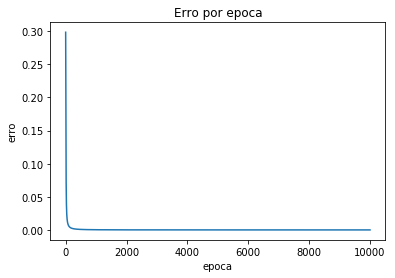

In [18]:
# Visualizar erros por epoca
plt.title('Erro por epoca')
plt.xlabel('epoca')
plt.ylabel('erro')
plt.plot(erro_epoca)
plt.show()

In [19]:
w

array([ 0.1824763 ,  0.2649526 ,  0.28175   ,  0.3635    , -1.45001259,
       -1.40331245,  1.52206766,  1.57297035])

In [20]:
b

array([ 0.99952597,  0.98499995, -2.34058822,  2.16628045])

In [21]:
# Pesos iniciais
w = np.array([0.15, #w1
              0.20, #w2
              0.25, #w3
              0.30, #w4
              0.40, #w5
              0.45, #w6
              0.50, #w7
              0.55  #w8
             ])
b = np.array([0.35,
              0.35,
              0.60,
              0.60])
#Executar modelo:
tx_aprendizagem = 0.5
max_epocas = 1000
erro_epoca, epoca, b, w = modelo(X, Y, w, b, tx_aprendizagem, max_epocas, False)
print ('Epocas = ',epoca)
print ('Erro = ', erro_epoca[epoca-1])

Epocas =  1000
Erro =  0.00027110842166


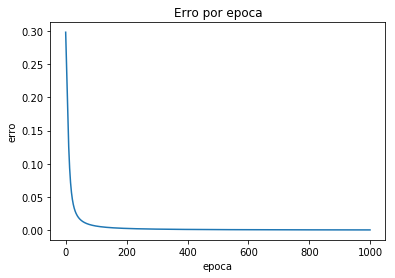

In [22]:
# Visualizar erros por epoca
plt.title('Erro por epoca')
plt.xlabel('epoca')
plt.ylabel('erro')
plt.plot(erro_epoca)
plt.show()

In [23]:
# Pesos iniciais
w = np.array([0.15, #w1
              0.20, #w2
              0.25, #w3
              0.30, #w4
              0.40, #w5
              0.45, #w6
              0.50, #w7
              0.55  #w8
             ])
b = np.array([0.35,
              0.35,
              0.60,
              0.60])
#Executar modelo:
tx_aprendizagem = 0.5
max_epocas = 1000000
erro_epoca, epoca, b, w = modelo(X, Y, w, b, tx_aprendizagem, max_epocas, False)
print ('Epocas = ',epoca)
print ('Erro = ', erro_epoca[epoca-1])

Epocas =  1000000
Erro =  9.02522573858e-28


In [24]:
#Verificar:
Y1, Y2 = predicao(X, w, b)
print ('Y1 = ', Y1)
print ('Y2 = ', Y2)

Y1 =  0.01
Y2 =  0.99
